In [1]:
import os
import glob
import re
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import functools
from nilearn import plotting, image
from nilearn.plotting import plot_stat_map, view_img_on_surf
import itertools
from IPython.display import HTML
import report_fun
import pingouin as pg
from nltools.data import Brain_Data, Design_Matrix, Adjacency
from nltools.mask import expand_mask, roi_to_brain

/Users/BerniceCheung/Dropbox (University of Oregon)/ResearchProject/DEV/DEV_RS/dev_rs_env/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/Users/BerniceCheung/Dropbox (University of Oregon)/ResearchProject/DEV/DEV_RS/dev_rs_env/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# set study parameter
#base_dir = '/home/kcheung3/sanlab/DEV_RS'
base_dir = '/Users/BerniceCheung/Dropbox (University of Oregon)/ResearchProject/DEV/DEV_RS'
output_brain_dir = os.path.join(base_dir, 'baseline_analysis', 'graph_physio_pcorr', 'brain_image')

# load the physio and self report data set
base_dv = pd.read_csv(os.path.join(base_dir, 'dv_data', 'outputs', 'sub_data_baseline_w_clean.csv'))

# extract the subject ID
sub_ids = list(base_dv['SID'])

# load the parcellation mask
mask = Brain_Data(os.path.join(base_dir, 'masks', 'Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'))
mask_x = expand_mask(mask)
#atlas_img = image.load_img(os.path.join(base_dir, 'masks', 'Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'))

# load the parcellation reference sheet
net_ref = pd.read_csv(os.path.join(base_dir, 'masks', 'Schaefer_networkLabels.csv'))

# Partial correlation between body fat percentage and resting state network topology

In [46]:
def plot_roi(roi_pcorr_df, mask_x): 
    ''' 
    This function is for plotting the ROIs that correlated with the DV
    '''
    # extract the partial correlation values
    pcorr_value = list(roi_pcorr_df['Body_fat_s1_corr'])
    # initiate a list of zeros
    dc_pcorr_plot = [0] * 100

    # replace the corresponding ROIs with the coefficients
    sig_idx = list(roi_pcorr_df['roi'] - 1)
    roi_df_idx = list(range(len(sig_idx)))

    for i, j in zip(sig_idx, roi_df_idx): dc_pcorr_plot[i] = pcorr_value[j]
    
    # plot the ROIs 
    brain_degree = roi_to_brain(dc_pcorr_plot, mask_x)
    brain_degree.plot()
    return brain_degree, dc_pcorr_plot

## Degree centrality

In [3]:
# load the output from bootstrapping
dv_name = 'Body_fat_s1'
pcorr_dir = os.path.join(base_dir, 'baseline_analysis', 'graph_physio_pcorr')
dc_fat_pcorr = pd.read_csv(os.path.join(pcorr_dir, f'dc_pcorr_concat_fat.csv'))

In [48]:
# filter rois that correlate with body fat
dc_fat_sig = dc_fat_pcorr[dc_fat_pcorr['p_value'] < 0.04]

In [26]:
print("The following ROIs had degree centrality that correlated with body fat on both acquisitions: ", list(net_ref.loc[list(dc_fat_sig.index),'ROI Name']))

The following ROIs had degree centrality that correlated with body fat on both acquisitions:  ['7Networks_LH_DorsAttn_Post_1', '7Networks_LH_Cont_pCun_1', '7Networks_LH_Default_Temp_2', '7Networks_RH_DorsAttn_Post_3']


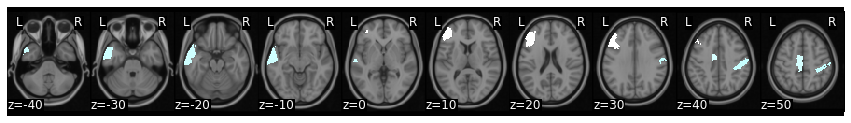

In [49]:
dc_fat_sig_brain, dc_fat_sig_list = plot_roi(dc_fat_sig, mask_x)
#dc_fat_sig_brain.write(os.path.join(output_brain_dir, 'dc_fat_concat_sig_brain.nii.gz'))

In [66]:
dc_fat_sig_brain = roi_to_brain(dc_fat_sig_list, mask_x)
dc_fat_sig_brain.write(os.path.join(output_brain_dir, 'dc_fat_concat_sig_brain.nii.gz'))

## Betweeness Centrality

In [53]:
# load the output from bootstrapping
bc_fat_pcorr = pd.read_csv(os.path.join(pcorr_dir, f'bc_pcorr_concat_fat.csv'))
# filter rois that correlate with body fat
bc_fat_sig = bc_fat_pcorr[bc_fat_pcorr['p_value'] < 0.05]
print("The following ROIs had degree centrality that correlated with body fat on both acquisitions: ", list(net_ref.loc[list(bc_fat_sig.index),'ROI Name']))

The following ROIs had degree centrality that correlated with body fat on both acquisitions:  ['7Networks_LH_Vis_1', '7Networks_LH_Vis_4', '7Networks_LH_DorsAttn_Post_1', '7Networks_RH_SomMot_4', '7Networks_RH_Default_PFCdPFCm_1', '7Networks_RH_Default_PFCdPFCm_2']


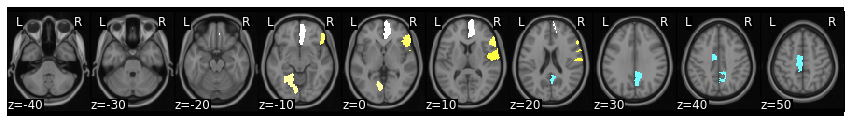

In [71]:
bc_fat_sig_brain,bc_fat_sig_list  = plot_roi(bc_fat_sig, mask_x)
#bc_fat_sig_brain.write(os.path.join(output_brain_dir, 'bc_fat_concat_sig_brain.nii.gz'))

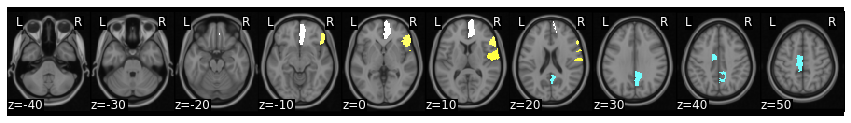

In [72]:
bc_fat_sig_list[2] = 0
brain_degree = roi_to_brain(bc_fat_sig_list, mask_x)
brain_degree.plot()

In [73]:
brain_degree.write(os.path.join(output_brain_dir, 'bc_fat_concat_sig_brain.nii.gz'))

## closeness_centrality

In [42]:
# load the output from bootstrapping
cc_fat_pcorr = pd.read_csv(os.path.join(pcorr_dir, f'cc_pcorr_concat_fat.csv'))
# filter rois that correlate with body fat
cc_fat_sig = cc_fat_pcorr[cc_fat_pcorr['p_value'] < 0.03]
print("The following ROIs had degree centrality that correlated with body fat on both acquisitions: ", list(net_ref.loc[list(cc_fat_sig.index),'ROI Name']))

The following ROIs had degree centrality that correlated with body fat on both acquisitions:  ['7Networks_LH_Vis_7', '7Networks_LH_DorsAttn_Post_1', '7Networks_LH_SalVentAttn_Med_3', '7Networks_RH_Vis_5']


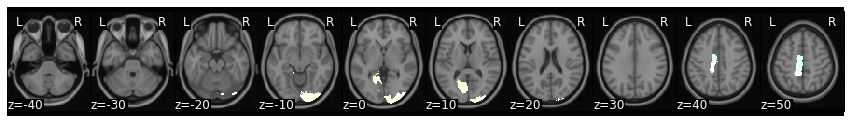

In [43]:
cc_fat_sig_brain = plot_roi(cc_fat_sig, mask_x)
cc_fat_sig_brain.write(os.path.join(output_brain_dir, 'cc_fat_concat_sig_brain.nii.gz'))

## cluster_coefficients

In [60]:
# load the output from bootstrapping
cluster_fat_pcorr = pd.read_csv(os.path.join(pcorr_dir, f'cluster_pcorr_concat_fat.csv'))
# filter rois that correlate with body fat
cluster_fat_sig = cluster_fat_pcorr[cluster_fat_pcorr['p_value'] < 0.04]
print("The following ROIs had degree centrality that correlated with body fat on both acquisitions: ", list(net_ref.loc[list(cluster_fat_sig.index),'ROI Name']))

The following ROIs had degree centrality that correlated with body fat on both acquisitions:  ['7Networks_RH_Vis_3', '7Networks_RH_SomMot_4', '7Networks_RH_Cont_Par_2']


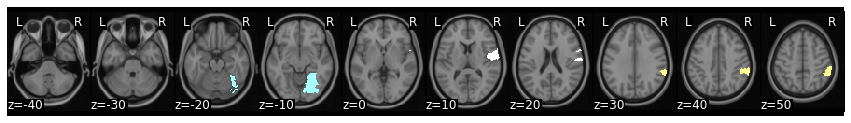

In [61]:
cluster_fat_sig_brain, cluster_fat_list = plot_roi(cluster_fat_sig, mask_x)
cluster_fat_sig_brain.write(os.path.join(output_brain_dir, 'cluster_fat_concat_sig_brain.nii.gz'))

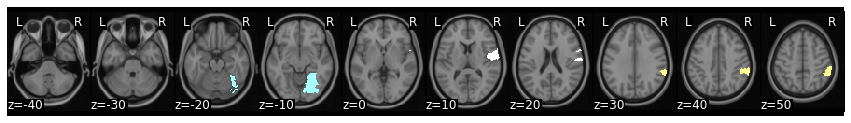

In [74]:
cluster_fat_sig_brain, cluster_fat_list = plot_roi(cluster_fat_sig, mask_x)

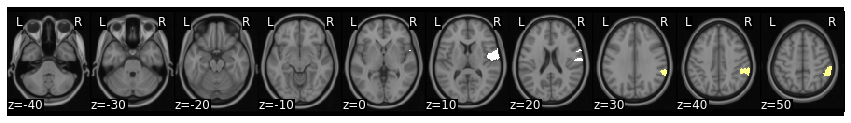

In [75]:
cluster_fat_list[51] = 0
brain_degree = roi_to_brain(cluster_fat_list, mask_x)
brain_degree.plot()

In [70]:
brain_degree.write(os.path.join(output_brain_dir, 'cluster_fat_concat_sig_brain.nii.gz'))